# <center>Performance Test

This notebook performs speed tests on the module `QM_1D_TI` for when Numba is used and when it is not. Depending on the type of computer and the libraries installed, the performance of Numba will vary. If it turns out that using Numba is slowing things down, go to the subfolder `./QM_1D_TI` and delete `QM_1D_TI_Numba.py`.

In [1]:
import QM_1D_TI.QM_1D_TI as module1
try:
    import QM_1D_TI.QM_1D_TI_Numba as module2
except:
    pass

from time import perf_counter
import numpy as np
import matplotlib.pyplot as plt

def test(module):
    x = np.linspace(-0.5, 0.5, 512)
        
    print("Time of ... ")
    print("constructing U(t):")
    time_list = []

    for _ in range (1):
        t1 = perf_counter()
        U = module.Unitary_Operator_1D(x**2)
        t2 = perf_counter()
        time_list.append(t2-t1)

    print(sum(time_list)/len(time_list))
      
    def gauss(x, sigma):
        u = np.array([xi/sigma for xi in x], np.complex128)
        return np.exp(-0.5*u**2)

    psi = module.Wavefunction_1D(gauss(x-0.25,0.1))
      
    print("evolving wavefunction 1000 times:")
    t1 = perf_counter()
    for _ in range (1000):
        U(psi)
    t2 = perf_counter()
    print(t2 - t1)
        
    print("computing eigenvectors and eigenvalues:")
    t1 = perf_counter()
    U.Set_Energy_Eigenstates() 
    t2 = perf_counter()
    print(t2 - t1)
      
    plt.title("Wavefunction in SHO")
    plt.plot(x, np.real(psi.x), label = "Re($\psi(x)$)")
    plt.plot(x, np.imag(psi.x), label = "Im($\psi(x)$)")
    plt.plot(x, np.abs(psi.x), label = "$|\psi(x)|$", color="black")
    plt.legend()
    plt.xlabel("x (Natural Units)")
    plt.grid()
      
    plt.show()
    plt.close()

/media/lamoren1/KINGSTON/Repositories/1D-Quantum-Mechanics-Applet/QM_1D_TI/QM_1D_TI_Numba.py:8: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(complex128, 2d, A), array(complex128, 1d, A))
  psix = np.dot(U, psix)


#### Here are the performance stats without Numba:

Time of ... 
constructing U(t):
0.06492658599745482
evolving wavefunction 1000 times:
0.4024978219822515
computing eigenvectors and eigenvalues:
0.09055946199805476


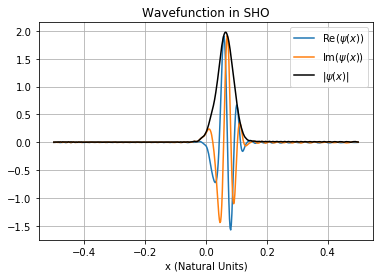

In [2]:
test(module1)

#### Here are the performance stats with Numba:

Time of ... 
constructing U(t):
0.05856807800591923
evolving wavefunction 1000 times:
0.5956940119795036
computing eigenvectors and eigenvalues:
0.10979271799442358


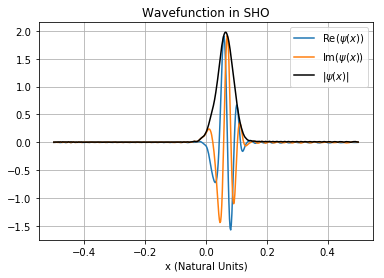

In [3]:
test(module2)